<a href="https://colab.research.google.com/github/kannan-ux/sakthikannan--s/blob/main/treedecision_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
df=pd.read_csv("/content/car_evaluation.csv",header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [7]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.shape

(1728, 7)

In [9]:
col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns=col_names

In [10]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [11]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
  print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [14]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [15]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [19]:
X=df.drop('class',axis=1)

In [20]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [21]:
Y=df['class']

In [22]:
Y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [25]:
X_train.shape

(1382, 6)

In [26]:
X_train

,buying,maint,doors,persons,lug_boot,safety
920,med,vhigh,4,2,small,high
700,high,med,3,more,big,med
1697,low,low,4,more,med,high
221,vhigh,med,2,2,med,high
288,vhigh,med,4,more,small,low
...,...,...,...,...,...,...
623,high,high,5more,2,small,high
1276,med,low,5more,2,big,med
1546,low,med,3,2,big,med
1428,low,high,2,more,big,low


In [27]:
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [29]:
pip install --upgrade category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


In [32]:
import category_encoders as ce

In [39]:
encoders=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [41]:
X_train=encoders.fit_transform(X_train)

In [42]:
X_test=encoders.fit_transform(X_test)

In [43]:
X_train

,buying,maint,doors,persons,lug_boot,safety
920,1,1,1,1,1,1
700,2,2,2,2,2,2
1697,3,3,1,2,3,1
221,4,2,3,1,3,1
288,4,2,1,2,1,3
...,...,...,...,...,...,...
623,2,4,4,1,1,1
1276,1,3,4,1,2,2
1546,3,2,2,1,2,2
1428,3,4,3,2,2,3


In [60]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)

In [61]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [62]:
clf.score(X_train,Y_train)

0.808972503617945

In [63]:
clf.score(X_test,Y_test)

0.5578034682080925

In [65]:
Y_pred=clf.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
y_pred_gini=accuracy_score(Y_test,Y_pred)

In [49]:
y_pred_gini

0.5578034682080925

In [66]:
Y_pred1=clf.predict(X_train)
y_pred1_gini=accuracy_score(Y_train,Y_pred1)

In [67]:
y_pred1_gini

0.808972503617945

In [57]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [58]:
from sklearn import tree

[Text(0.6, 0.875, 'x[5] <= 2.5\ngini = 0.456\nsamples = 1382\nvalue = [305, 58, 970, 49]'),
 Text(0.4, 0.625, 'x[3] <= 1.5\ngini = 0.578\nsamples = 920\nvalue = [305, 58, 508, 49]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 310\nvalue = [0, 0, 310, 0]'),
 Text(0.6, 0.375, 'x[1] <= 1.5\ngini = 0.629\nsamples = 610\nvalue = [305, 58, 198, 49]'),
 Text(0.4, 0.125, 'gini = 0.463\nsamples = 151\nvalue = [55, 0, 96, 0]'),
 Text(0.8, 0.125, 'gini = 0.627\nsamples = 459\nvalue = [250, 58, 102, 49]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 462\nvalue = [0, 0, 462, 0]')]

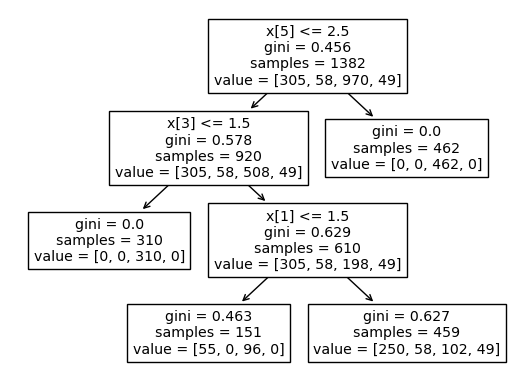

In [68]:
tree.plot_tree(clf.fit(X_train,Y_train))

In [69]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)

In [70]:
cm

array([[ 28,   0,  51,   0],
       [  6,   0,   5,   0],
       [ 75,   0, 165,   0],
       [  0,   0,  16,   0]])

In [72]:
print(cm[0,0])

28


In [73]:
cm[1,1]

0

In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         acc       0.26      0.35      0.30        79
        good       0.00      0.00      0.00        11
       unacc       0.70      0.69      0.69       240
       vgood       0.00      0.00      0.00        16

    accuracy                           0.56       346
   macro avg       0.24      0.26      0.25       346
weighted avg       0.54      0.56      0.55       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
